## GATHERING DATA

In [42]:
# Import the basic packages 
import pandas as pd
import numpy as np

In [43]:
# Load twitter_archive_enhanced in df_1
enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [44]:
# Checl number of tweets
tweet_ids = enhanced.tweet_id.values
len(tweet_ids)

2356

In [45]:
# Load the archive image_predictions.tsv programmatically from
# Udacity server using requests
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)   
r

<Response [200]>

In [46]:
# Save data in image-predictions.tsv
import os

with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(r.content)

In [47]:
#Check if exists in the folder
os.listdir()

['twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'act_report.ipynb',
 'tweet-json.txt',
 'act_report.html',
 'image-predictions.tsv',
 'wrangle_report.html',
 '.ipynb_checkpoints',
 'wrangle_report.ipynb',
 'wrangle_act.ipynb']

In [48]:
# Import the necessary packages and connect with Twitter API 
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = '9MjeV5Mx1Yy4O3Li1l5U4La3j'
consumer_secret = 'sivJ9GHFdgsgzZR5PRKCkV0cVBjoC7EB7ZDAAp7WDs8KTwVLhn'
access_token = '2489324214-64w6X1fKalTLlMSOKYyou8ctm4Dwiwq964txMP7'
access_secret = 'uztyfyyU0ufZ2XFP1kuUQSVguOuVDHVyoBFCbJLafm473'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)            


# test authentication
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [73]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
tweet_ids = enhanced.tweet_id.values
count = 0
data= []
fail_tweets = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            data.append(tweet)
        except tweepy.TweepError as e:
            print("Fail")
            fail_tweets[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fail_tweets)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

KeyboardInterrupt: 

## ASSESSING DATA

### `enhanced` (twitter-archive-enhanced.csv)

We load twitter-archive-enhanced.csv in df_1.

In [49]:
# load dataset twitter-archive-enhanced.csv in a dataframe called df_1
enhanced = pd.read_csv('twitter-archive-enhanced.csv')

We check df_1 with shape, info() and head.

In [50]:
# Check df_1 with shape, info() and head.
print('Shape: ', enhanced.shape)
print('')
print(enhanced.info())
enhanced.head(5)

Shape:  (2356, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: floa

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> At first sight we note that we have null values in columns that we are interested: 
- in_reply_to_status_id (78 non-null values)
- in_reply_to_user_id (78 non-null values)
- retweeted_status_id (181 non-null values)
- retweeted_status_user_id (181 non-null)
- retweeted_status_timestamp (181 non-null values) 

> We note that there are null values in the columns related to reply and reteweted so it is initially believed to correspond to the tweets that are not needed and will be used to filter the data later. The rest of the columns do not have any null value, but maybe we have hidden null values between correct ones.

> At first glance we can see that we only have null values in the columns that we need filter for non_null values after which we will check with the json file.

> We also observe that the datatype of the column datetime is object.

> We observe that the columns related to dog stages (poppo,..) must be in one column.

We check if the names are correct extracting names that start with lowercase and the names called None that we also observe that isn0t correct.

In [51]:
# We carry out a first check with value_counts()
enhanced[enhanced.name.duplicated()]['name'].value_counts()

None         744
a             54
Charlie       11
Oliver        10
Cooper        10
Lucy          10
Tucker         9
Lola           9
Penny          9
Bo             8
Winston        8
Sadie          7
the            7
an             6
Toby           6
Bailey         6
Buddy          6
Daisy          6
Dave           5
Jax            5
Oscar          5
Leo            5
Bella          5
Stanley        5
Rusty          5
Jack           5
Koda           5
Scout          5
Milo           5
Chester        4
            ... 
Moreton        1
Hurley         1
Ken            1
Mister         1
Chipson        1
actually       1
Eli            1
Misty          1
Raymond        1
Benedict       1
Klein          1
Jamesy         1
Aspen          1
Theodore       1
Jesse          1
Hunter         1
Remington      1
Meyer          1
Jeph           1
Sam            1
Balto          1
Watson         1
Neptune        1
Yogi           1
Herschel       1
Herm           1
Levi           1
Cody          

In [52]:
# Check if the names are correct extracting names that start with lowercase.
error_names = enhanced['name'].str.extract('(^[a-z]*)', expand = True)
error_names = error_names[0]
error_names.value_counts()

                2247
a                 55
the                8
an                 7
very               5
one                4
just               4
quite              4
mad                2
actually           2
not                2
getting            2
his                1
old                1
unacceptable       1
my                 1
this               1
all                1
incredibly         1
by                 1
life               1
light              1
infuriating        1
such               1
space              1
officially         1
Name: 0, dtype: int64

In [53]:
# Check the number of values of name called None. 
error_None = enhanced['name'].str.extract('(^None*)', expand = True)
error_None = error_None[0]
error_None.value_counts()

None    745
Name: 0, dtype: int64

> We have missing values with the name of None.

> We note errors in some values how 'a', 'an' 'the' and 'quite' and many more.

We check  with sort_values() if rating_numerator and rating_denominator are correct filtering for numerators equals to 0 and different than 50, and for denominators different than 10.

In [54]:
# Check rating_numerator and rating_denominator with sort_values
print(enhanced[enhanced['rating_numerator'] == 0]['rating_numerator'].sort_values())
print('')
print(enhanced[enhanced['rating_numerator'] != 50]['rating_numerator'].sort_values())

315     0
1016    0
Name: rating_numerator, dtype: int64

1016       0
315        0
1446       1
1940       1
2091       1
605        1
1869       1
2335       1
2261       1
2038       1
2338       1
2079       2
2246       2
1764       2
2326       2
1761       2
2310       2
2349       2
1920       2
2237       2
1478       3
1836       3
1938       3
1249       3
2202       3
1928       3
1898       3
1406       3
2239       3
1692       3
        ... 
418       14
426       14
110       14
285       15
291       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1351      60
340       75
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2355, dtype: int64


> We note that we have 2 numerators equals to 0 so we chec to know what happens to them

In [55]:
# Check the two rows with rating_numeraator equal to 0.
enhanced[enhanced['rating_numerator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [56]:
# Check the rating_denominator different to 0.
enhanced[enhanced['rating_denominator'] != 10][['tweet_id', 'in_reply_to_status_id', 'retweeted_status_id', 'rating_numerator', 'rating_denominator', 'text']]

,tweet_id,in_reply_to_status_id,retweeted_status_id,rating_numerator,rating_denominator,text
313,835246439529840640,8.352460e+17,NaN,960,0,@jonnysun @Lin_Manuel ok jomny I know you're e...
342,832088576586297345,8.320875e+17,NaN,11,15,@docmisterio account started on 11/15/15
433,820690176645140481,NaN,NaN,84,70,The floofs have been released I repeat the flo...
516,810984652412424192,NaN,NaN,24,7,Meet Sam. She smiles 24/7 &amp; secretly aspir...
784,775096608509886464,NaN,7.403732e+17,9,11,"RT @dog_rates: After so many requests, this is..."
902,758467244762497024,NaN,NaN,165,150,Why does this never happen at my front door......
1068,740373189193256964,NaN,NaN,9,11,"After so many requests, this is Bretagne. She ..."
1120,731156023742988288,NaN,NaN,204,170,Say hello to this unbelievably well behaved sq...
1165,722974582966214656,NaN,NaN,4,20,Happy 4/20 from the squad! 13/10 for all https...
1202,716439118184652801,NaN,NaN,50,50,This is Bluebert. He just saw that both #Final...


> We note that we have errors in rating_denominators in tweets that don't are replies or retweets, and we cannot check whic is rating correct because the text is not complete. At the same time in rating_numerator we have two 0 values which on of these is a reply, and the another we cannot check if is correct for the same reason we described before.

We check the dates for registers no further than 1 August of 2018.

In [57]:
# Check dates
enhanced.timestamp.min(), enhanced.timestamp.max()

('2015-11-15 22:32:08 +0000', '2017-08-01 16:23:56 +0000')

> We notice we haven't values for the tweets beyond August 1st, 2017  and the datatype is in object, it would be more recommended that it was in datetime

We check for duplicates.

In [58]:
# Chec names id's duplicated
sum(enhanced.tweet_id.duplicated())

0

In [59]:
# Check names duplicated
sum(enhanced.name.duplicated())

1399

> We don't have duplicates in the column tweet id.

> We have duplicates in the column name but I think that is normal because many dogs can have the same name.

### `image` (image-predictions.tsv)

We load image-predictions.tsv in df_2.

In [60]:
image = pd.read_csv('image-predictions.tsv', sep='\t')

We check df_2.

In [61]:
print('Shape: ', image.shape)
print('')
print(image.info())
print('')
print(image.dtypes)
image.head(5)

Shape:  (2075, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


> We note that we haven¡t null values and we only need the first three top columns, which are tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images), so we will need to delete all the columns that we don't need.

In [62]:
# We check for unique values
image['tweet_id'].nunique()

2075

> All the tweet_id values are unique

In [63]:
# We check if we have duplicates
image[image['tweet_id'].duplicated() == True]['tweet_id'].count()

0

> All the tweet_id value are not duplicated.

### `tweet_df` (tweet-json.txt)

We load tweet-json line to line

In [64]:
# We laad tweet-json.txt in tweet_df.
with open('tweet-json.txt') as f:
    tweet_df = pd.DataFrame(json.loads(line) for line in f)

In [65]:
# We check tweet_df.
print('Shape: ', tweet_df.shape)
print('')
print(tweet_df.info())
tweet_df.head(5)

Shape:  (2354, 31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str     

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


> We have 2 missing rows in `enhanced` because `tweet_df`has two rows less in its dimensions but its are retweets because we have 179 non-values in `tweet_df`instead of 181 non-values of `enhanced`.

We check the full text importing the data line to line from tweet-json.txt

In [66]:
# Extract the full texts from json
full_text = []
with open('tweet-json.txt','r') as f:
    for line in f.readlines():
        tweet_json = json.loads(line)
        tweet_text = tweet_json['full_text']
        full_text.append(tweet_text)

# Check
tweet_df[tweet_df.full_text.str.contains('&amp;')]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
261,None,None,Fri Mar 17 15:51:22 +0000 2017,"[0, 143]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 842765306540052480, 'id_str'...",7321,False,Meet Indie. She's not a fan of baths but she's...,None,...,False,NaN,NaN,NaN,1439,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
272,None,None,Sun Mar 12 00:59:17 +0000 2017,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Pipsy. He is a fluffbal...,None,...,NaN,NaN,NaN,NaN,18285,False,{'created_at': 'Thu Nov 19 01:27:25 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
319,None,None,Wed Feb 22 17:41:18 +0000 2017,"[0, 141]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 834458045388378116, 'id_str'...",10512,False,Meet Chester (bottom) &amp; Harold (top). They...,None,...,False,NaN,NaN,NaN,1899,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
460,None,None,Sat Jan 07 01:00:41 +0000 2017,"[0, 143]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 817536359321714688, 'id_str'...",13105,False,Say hello to Eugene &amp; Patti Melt. No matte...,None,...,False,NaN,NaN,NaN,3505,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
484,None,None,Thu Dec 29 21:06:41 +0000 2016,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,None,...,NaN,NaN,NaN,NaN,6750,False,{'created_at': 'Fri Feb 12 17:22:12 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
515,None,None,Mon Dec 19 23:06:23 +0000 2016,"[0, 143]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 810984648008466432, 'id_str'...",5927,False,Meet Sam. She smiles 24/7 &amp; secretly aspir...,None,...,False,NaN,NaN,NaN,1655,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
798,None,None,Mon Sep 05 15:58:34 +0000 2016,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 772826251237199873, 'id_str'...",8842,False,Meet Roosevelt. He's preparing for takeoff. Ma...,None,...,False,NaN,NaN,NaN,2669,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
887,None,None,Sun Jul 31 16:50:42 +0000 2016,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 759793413751472128, 'id_str'...",6620,False,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",None,...,False,NaN,NaN,NaN,2173,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
896,None,None,Fri Jul 29 02:40:28 +0000 2016,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 758854659951865861, 'id_str'...",3904,False,This is Lilli Bee &amp; Honey Bear. Unfortunat...,None,...,False,NaN,NaN,NaN,1027,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
974,None,None,Mon Jul 04 18:00:41 +0000 2016,"[0, 119]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 750023357219962880, 'id_str'...",2986,False,Meet Jax &amp; Jil. Jil is yelling the pledge ...,None,...,False,NaN,NaN,NaN,888,False,NaN,"<a href=""https://about.twitter.com/products/tw...",False,"{'id': 4196983835, 'id_str': '4196983835'

In [67]:
# We check 3 of all columns for see full text
full_text[261], full_text[272], full_text[319], full_text[460]

("Meet Indie. She's not a fan of baths but she's definitely a fan of hide &amp; seek. 12/10 click the link to help Indie\n\nhttps://t.co/fvGkIuAlFK https://t.co/kiCFtmJd7l",
 'RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://…',
 'Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe',
 'Say hello to Eugene &amp; Patti Melt. No matter how dysfunctional they get, they will never top their owners. Both 12/10 would pet at same time https://t.co/jQUdvtdYMu')

##### QUALITY ISSUES

**`enhanced` table**

- Many columns are unnecessary.
- categorical column.
- Erroneus datattypes in column timestamp.
- reply_to_status_id and retweeted_status_user_id columns should be converted to boolean.
- reply_to_status_id and retweeted_status_user_id columns should be renamed to reply and retweet respectively.
- Two missing columns for favortie cout and retweet count.
- Erroneus data in column name (None, a, an, the, ...).
- Erroneus data in rating_numerator and rating_denominator.
- Erroneus rows that are replies or retweets.
- Drop columns related with reply and retweet because we don't need its after changes.

**`image` table**

- Many columns are unnecessary.
- jpg_url column sholud be transformed into name of the image file.
- img_num columns should be renamed to image_number.

**`tweet_df` tabble**

- Many columns are unnecessary.
- id column should be renamed to tweet_id.
- Two missing rows respect `enhanced_clean`, 2354 intead of 2356. **we don't do anything at this moment**
- in_reply_to_status_id  and retweeted_status_user_id columns should be converted to boolean.
- in_reply_to_status_id  and retweeted_status_user_id columns should be renamed to reply_json and retweet_json respectively.

**TIDINESS ISSUES**

- The four columns related to dog stages should be simplified in one 
- `image`table should be part of `enhanced` table.
- Drop rows that haven't a image associated in final merged dataframe.

## CLEANING DATA

In [68]:
enhanced_clean = enhanced.copy()
image_clean = image.copy()
tweet_df_clean = tweet_df.copy()

### Quality issues

`enhanced`: Many columns are unnecessary.

##### Define

Many columns are unnecessary so we select the columns tweet_id, timestamp, in_reply_to_status_id, retweeted_status_user_id, text, name, and dog stages columns (doppo,..).

##### Code

In [69]:
# Select columns that we need
col_list = ['tweet_id', 'timestamp', 'in_reply_to_status_id', 'retweeted_status_user_id', 'text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']
enhanced_clean = enhanced_clean[col_list]

##### Test

In [70]:
# Check changes
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                    2356 non-null int64
timestamp                   2356 non-null object
in_reply_to_status_id       78 non-null float64
retweeted_status_user_id    181 non-null float64
text                        2356 non-null object
name                        2356 non-null object
doggo                       2356 non-null object
floofer                     2356 non-null object
pupper                      2356 non-null object
puppo                       2356 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 184.1+ KB


`image`: Many columns are unnecessary

##### Define
Many columns are unnecessary because we only need the three top columns so we select the columns tweet_id, jpg_url, img_num

##### Code

In [71]:
# Select columns that we need
col_list = ['tweet_id', 'jpg_url', 'img_num']
image_clean = image_clean[col_list]

##### Test

In [72]:
# Check changes
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
dtypes: int64(2), object(1)
memory usage: 48.7+ KB


`tweet_df`: Many columns are unnecessary.

##### Define
Many columns are unnecessary because we only need  so we select the columns id, in_reply_to_status_id, retweeted_status, full_text, favorite_count and retweet_count.

##### Code

In [73]:
# Select columns that we need
col_list = ['id', 'full_text', 'in_reply_to_status_id', 'retweeted_status', 'favorite_count', 'retweet_count']
tweet_df_clean = tweet_df_clean[col_list]

##### Test

In [74]:
# Check changes
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
id                       2354 non-null int64
full_text                2354 non-null object
in_reply_to_status_id    78 non-null float64
retweeted_status         179 non-null object
favorite_count           2354 non-null int64
retweet_count            2354 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 110.4+ KB


##### Test

In [75]:
enhanced_clean.dog_stage.value_counts()

AttributeError: 'DataFrame' object has no attribute 'dog_stage'

`enhanced`: Erroneus datattypes in column timestamp.

##### Define
We convert the timestamp column to datetime with datetime.strptime

In [76]:
# import datetime
from datetime import datetime

# convert object to datetime with datetime.strptime
enhanced_clean['timestamp'] = enhanced_clean['timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S +0000'))

##### Test

In [77]:
# Check
print(enhanced_clean.dtypes)

tweet_id                             int64
timestamp                   datetime64[ns]
in_reply_to_status_id              float64
retweeted_status_user_id           float64
text                                object
name                                object
doggo                               object
floofer                             object
pupper                              object
puppo                               object
dtype: object


`enhanced`: reply_to_status_id and retweeted_status_user_id columns should be converted to boolean.

##### Define
We change the values of in_reply_to_status_id and retweeted_status_user_id to boolean with np.isnan.

##### Code

In [78]:
# We change in_reply_to_status_id to boolean with the inverse of np.nan
enhanced_clean.in_reply_to_status_id = ~np.isnan(enhanced_clean.in_reply_to_status_id)

In [79]:
# We change retweeted_status_user_id to boolean with the inverse of np.nan
enhanced_clean.retweeted_status_user_id = ~np.isnan(enhanced_clean.retweeted_status_user_id)

##### Test

In [80]:
# Check changes
print(enhanced_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                    2356 non-null int64
timestamp                   2356 non-null datetime64[ns]
in_reply_to_status_id       2356 non-null bool
retweeted_status_user_id    2356 non-null bool
text                        2356 non-null object
name                        2356 non-null object
doggo                       2356 non-null object
floofer                     2356 non-null object
pupper                      2356 non-null object
puppo                       2356 non-null object
dtypes: bool(2), datetime64[ns](1), int64(1), object(6)
memory usage: 151.9+ KB
None


`enhanved_clean`: reply_to_status_id and retweeted_status_user_id columns should be renamed to reply and retweet respectively.

##### Define
We rename reply_to_status_id and retweeted_status_user_id columns to reply and retweet respectively with rename.

##### Code

In [81]:
enhanced_clean = enhanced_clean.rename(columns={'in_reply_to_status_id' : 'reply', 'retweeted_status_user_id' : 'retweet'})

##### Test

In [82]:
# Check changes
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id     2356 non-null int64
timestamp    2356 non-null datetime64[ns]
reply        2356 non-null bool
retweet      2356 non-null bool
text         2356 non-null object
name         2356 non-null object
doggo        2356 non-null object
floofer      2356 non-null object
pupper       2356 non-null object
puppo        2356 non-null object
dtypes: bool(2), datetime64[ns](1), int64(1), object(6)
memory usage: 151.9+ KB


`tweet_df`: id column should be renamed to tweet_id.

##### Define
We chande the name of id column to tweet_id with rename

##### Code

In [83]:
# We rename the column id to retweet_id.
tweet_df_clean = tweet_df_clean.rename(columns={'id' : 'tweet_id'})

##### Test

In [84]:
# Check changes
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id                 2354 non-null int64
full_text                2354 non-null object
in_reply_to_status_id    78 non-null float64
retweeted_status         179 non-null object
favorite_count           2354 non-null int64
retweet_count            2354 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 110.4+ KB


`tweet_df`: in_reply_to_status_id and retweeted_status columns should be renamed to reply and retweet respectively.

##### Define
We change the name of in_reply_to_status_id and retweeted_status columns to reply_json and retweet_json respectively with rename.

##### Code

In [85]:
# We change the name of in_reply_to_status_id and retweeted_status columns to reply_json and retweet_json respectively 
# with rename.
tweet_df_clean = tweet_df_clean.rename(columns={'in_reply_to_status_id' : 'reply_json', 'retweeted_status' : 'retweet_json'})

##### Test

In [86]:
# Check changes
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id          2354 non-null int64
full_text         2354 non-null object
reply_json        78 non-null float64
retweet_json      179 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 110.4+ KB


`enhanced`: Two missing columns for favortie cout and retweet count.

##### Define
We join left the tweet_df_clean into enhanced_clean with merge and left join.

##### Code

In [87]:
# We join left the tweet_df_clean into enhanced_clean with merge and left join..
df_combined = pd.merge(enhanced_clean, tweet_df_clean, how='left', on = 'tweet_id')

##### Test

In [88]:
# Check
print(df_combined.info())
df_combined.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id          2356 non-null int64
timestamp         2356 non-null datetime64[ns]
reply             2356 non-null bool
retweet           2356 non-null bool
text              2356 non-null object
name              2356 non-null object
doggo             2356 non-null object
floofer           2356 non-null object
pupper            2356 non-null object
puppo             2356 non-null object
full_text         2354 non-null object
reply_json        78 non-null float64
retweet_json      179 non-null object
favorite_count    2354 non-null float64
retweet_count     2354 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 262.3+ KB
None


,tweet_id,timestamp,reply,retweet,text,name,doggo,floofer,pupper,puppo,full_text,reply_json,retweet_json,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,False,False,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,39467.0,8853.0
1,892177421306343426,2017-08-01 00:17:27,False,False,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,This is Tilly. She's just checking pup on you....,NaN,NaN,33819.0,6514.0
2,891815181378084864,2017-07-31 00:18:03,False,False,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,25461.0,4328.0
3,891689557279858688,2017-07-30 15:58:51,False,False,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None,This is Darla. She commenced a snooze mid meal...,NaN,NaN,42908.0,8964.0
4,891327558926688256,2017-07-29 16:00:24,False,False,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None,This is Franklin. He would like you to stop ca...,NaN,NaN,41048.0,9774.0


> We observe that the **`datatype of favorite_count and retwwet_count columns are erroneus in df_combined after merging (1)`** (We'll do when we haven't null values in these columns).

`tweet_df`: in_reply_to_status_id and retweeted_status columns should be converted to boolean.

##### Define
We change the values of in_reply_to_status_id and retweeted_status to boolean with the inverse of np.isnan.

##### Code

In [89]:
# We change the values of in_reply_to_status_id and retweeted_status to boolean 
# with the inverse of np.isnan and np.isnull respectively.
tweet_df_clean.reply_json = ~np.isnan(tweet_df_clean.reply_json)
tweet_df_clean.retweet_json = ~pd.isnull(tweet_df_clean.retweet_json)

##### Test

In [90]:
# Check changes
print(tweet_df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id          2354 non-null int64
full_text         2354 non-null object
reply_json        2354 non-null bool
retweet_json      2354 non-null bool
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: bool(2), int64(3), object(1)
memory usage: 78.2+ KB
None


`enhanced`: Erroneus data in column name (None, a, an, the, ...).

##### Define
We extract the name from `full_text` column with regex correctly and exchange these values for the `name` colum of df_combined.

##### Code

In [91]:
#full_text_series = pd.Series(full_text)
names = df_combined.full_text.str.extract('(((?<=[Tt]his\sis\s)|(?<=[Hh]elp\s)|(?<=[Mm]eet\s)|(?<=[Ss]ay\shello\sto\s)|(?<=[Hh]ere\sis\s))[A-Z]+[a-z]*)', expand = True)

# We extracted the name into a array, the column index 1
# will not help us at all, so the index 0 is useful to us
df_combined['name'] = names[0]                              

##### Test

In [92]:
# Check changes
print(df_combined.info())
df_combined.name.head() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id          2356 non-null int64
timestamp         2356 non-null datetime64[ns]
reply             2356 non-null bool
retweet           2356 non-null bool
text              2356 non-null object
name              1506 non-null object
doggo             2356 non-null object
floofer           2356 non-null object
pupper            2356 non-null object
puppo             2356 non-null object
full_text         2354 non-null object
reply_json        78 non-null float64
retweet_json      179 non-null object
favorite_count    2354 non-null float64
retweet_count     2354 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 262.3+ KB
None


0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: object

`enhanced`: Erroneus data in rating_numerator and rating_denominator.

##### Define
We extract the rating numerator and rating denominator from `full_text` column of df_combined with regex correctly and exchange these values in rating_numerator and rating_denominator columns.

##### Code

In [93]:
ratings = df_combined.full_text.str.extract('((?:[1-9]\d*\.)?([1-9][0-9]*)|0{1})\/([1-9][0-9]?\d+)', expand = True)

# We convert to float instead to object. 
# We extracted the nominator and denominator into a array, the column index 1
# will not help us at all, so the index 0 and 2 is useful to us
df_combined['rating_numerator'] = ratings[0].astype(float)
df_combined['rating_denominator'] = ratings[2].astype(float)

##### Test

In [94]:
# Check changes
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
reply                 2356 non-null bool
retweet               2356 non-null bool
text                  2356 non-null object
name                  1506 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
full_text             2354 non-null object
reply_json            78 non-null float64
retweet_json          179 non-null object
favorite_count        2354 non-null float64
retweet_count         2354 non-null float64
rating_numerator      2353 non-null float64
rating_denominator    2353 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(5), int64(1), object(8)
memory usage: 299.1+ KB


> We have three null values in rating_numerator and rating_denominator. We check these.

In [95]:
df_combined[df_combined['rating_numerator'].isnull()]

,tweet_id,timestamp,reply,retweet,text,name,doggo,floofer,pupper,puppo,full_text,reply_json,retweet_json,favorite_count,retweet_count,rating_numerator,rating_denominator
19,888202515573088257,2017-07-21 01:02:36,False,True,RT @dog_rates: This is Canela. She attempted s...,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
516,810984652412424192,2016-12-19 23:06:23,False,False,Meet Sam. She smiles 24/7 &amp; secretly aspir...,Sam,None,None,None,None,Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,5927.0,1655.0,NaN,NaN
815,771004394259247104,2016-08-31 15:19:06,False,True,RT @katieornah: @dog_rates learning a lot at c...,NaN,None,None,pupper,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
tweet_df_clean[tweet_df_clean['tweet_id'] == 888202515573088257]

,tweet_id,full_text,reply_json,retweet_json,favorite_count,retweet_count


In [97]:
tweet_df_clean[tweet_df_clean['tweet_id'] == 810984652412424192]

,tweet_id,full_text,reply_json,retweet_json,favorite_count,retweet_count
515,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,False,False,5927,1655


In [98]:
tweet_df_clean[tweet_df_clean['tweet_id'] == 771004394259247104]

,tweet_id,full_text,reply_json,retweet_json,favorite_count,retweet_count


In [99]:
full_text[515]

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

> Two of the three null values are retweets that don't exists in tweet_df_clean and is difference of shapes between enhanced table and tweet_df table so we are not concerned, and the another null value is because in the respective text not exists any rating. **`We will drop later this row with index 516 from df_combined (2)`**.

`enhanced`: Erroneus rows that are replies or retweets.

##### Define
We only select the rows where reply or retweet are False in `df_combined`

##### Code

In [100]:
df_combined = df_combined[df_combined['retweet'] == False]
df_combined = df_combined[df_combined['reply'] == False ]

##### Test

In [101]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
reply                 2097 non-null bool
retweet               2097 non-null bool
text                  2097 non-null object
name                  1392 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
full_text             2097 non-null object
reply_json            0 non-null float64
retweet_json          0 non-null object
favorite_count        2097 non-null float64
retweet_count         2097 non-null float64
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(5), int64(1), object(8)
memory usage: 266.2+ KB


> We observe that now we have null values in name and dog_stage columns which is correct, but one null value of rating_numerator and rating_denominator continue so que finally we need drop the row wth index 56.

**(1)** `df_combined`: datatype of favorite_count and retwwet_count columns are erroneus in df_combined after merging.

##### Define
We change the float dataype of favorite_count and retweet_count to int from df_combined with astype().

##### Code

In [102]:
df_combined.favorite_count = df_combined.favorite_count.astype(int)
df_combined.retweet_count = df_combined.retweet_count.astype(int)

##### Test

In [103]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
reply                 2097 non-null bool
retweet               2097 non-null bool
text                  2097 non-null object
name                  1392 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
full_text             2097 non-null object
reply_json            0 non-null float64
retweet_json          0 non-null object
favorite_count        2097 non-null int64
retweet_count         2097 non-null int64
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 266.2+ KB


**(2)** `df_combined`: We will drop later this row with index 516 from df_combined 

##### Define
We drop the row with index 516 from df_combined with drop.

##### Code

In [104]:
df_combined.drop(516, inplace=True)

##### Test

In [105]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id              2096 non-null int64
timestamp             2096 non-null datetime64[ns]
reply                 2096 non-null bool
retweet               2096 non-null bool
text                  2096 non-null object
name                  1391 non-null object
doggo                 2096 non-null object
floofer               2096 non-null object
pupper                2096 non-null object
puppo                 2096 non-null object
full_text             2096 non-null object
reply_json            0 non-null float64
retweet_json          0 non-null object
favorite_count        2096 non-null int64
retweet_count         2096 non-null int64
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 266.1+ KB


> We observe now that now the non-vaues of the dataframe is correct.

`image`: jpg_url column sholud be transformed into name of the image file.

##### Define
We extract the in a variable called url the names of the names of the images from jpg_url with split function, we substitute the values and then change the name of this column to image_name with rename.

##### Code

In [106]:
# We extract with split function the name of the image 
# file from jpg_url and then we rename the column jpg_url to image_name
url = image_clean[image_clean['jpg_url'].notnull()]['jpg_url'].str.rsplit('/', n=1, expand=True) 
url = url.drop(0, axis=1)
image_clean['jpg_url'] = url
image_clean = image_clean.rename(columns={'jpg_url' : 'image_name'})

##### Test

In [107]:
# Check changes
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id      2075 non-null int64
image_name    2075 non-null object
img_num       2075 non-null int64
dtypes: int64(2), object(1)
memory usage: 48.7+ KB


`enhanced`: Drop columns `reply` and `retweet` because we don't need its after changes.**

**Define**

We drop columns reply and retweet with drop function

##### Code

In [108]:
master = master.drop(['reply', 'retweet'], axis=1)

NameError: name 'master' is not defined

##### Test

In [109]:
master.info()

NameError: name 'master' is not defined

`image`: img_num columns should be renamed to image_number.

##### Define
We rename img_num column to image_number with rename.

##### Code

In [110]:
image_clean = image_clean.rename(columns={'img_num' : 'image_number'})

##### Test

In [111]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id        2075 non-null int64
image_name      2075 non-null object
image_number    2075 non-null int64
dtypes: int64(2), object(1)
memory usage: 48.7+ KB


### Tidiness Issues

`tweet_df`: The four columns related to dog stages should be simplified in one categorical column.

##### Define
We create a new column called dog_stages with all the values of the four columns related to dgo stages and we change de datatype to categorical with asfloat(category), and then we drop the another four columns.

##### Code

In [112]:
# We replace the Nones for whitespaces
enhanced_clean.doggo.replace('None', '', inplace=True)
enhanced_clean.floofer.replace('None', '', inplace=True)
enhanced_clean.pupper.replace('None', '', inplace=True)
enhanced_clean.puppo.replace('None', '', inplace=True)

In [113]:
# We create new column called dog_stage with all the values
enhanced_clean['dog_stage'] = enhanced_clean.doggo + enhanced_clean.floofer + enhanced_clean.pupper + enhanced_clean.puppo

In [114]:
enhanced_clean.loc[enhanced_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
enhanced_clean.loc[enhanced_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
enhanced_clean.loc[enhanced_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [115]:
# We set null values
enhanced_clean.loc[enhanced_clean.dog_stage == '', 'dog_stage'] = np.nan

In [116]:
# We drop the columns 'doggo', 'floofer', 'pupper' and 'puppo'
enhanced_clean = enhanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [117]:
# We change the data type of dog_stage to categorical with 
# astype('category')
enhanced_clean['dog_stage'] = enhanced_clean['dog_stage'].astype('category')

##### Test

In [118]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id     2356 non-null int64
timestamp    2356 non-null datetime64[ns]
reply        2356 non-null bool
retweet      2356 non-null bool
text         2356 non-null object
name         2356 non-null object
dog_stage    380 non-null category
dtypes: bool(2), category(1), datetime64[ns](1), int64(1), object(2)
memory usage: 81.0+ KB


`image` table should be part of `enhanced` table.

##### Define
We merge `df_combined` dataframe with `image_clean` dataframe in a new dataframe called master with merge function and left join by tweet_id column.

In [119]:
master = pd.merge(df_combined, image_clean, how='left', on = 'tweet_id')

##### Test

In [120]:
# Check
print(master.info())
master.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2095
Data columns (total 19 columns):
tweet_id              2096 non-null int64
timestamp             2096 non-null datetime64[ns]
reply                 2096 non-null bool
retweet               2096 non-null bool
text                  2096 non-null object
name                  1391 non-null object
doggo                 2096 non-null object
floofer               2096 non-null object
pupper                2096 non-null object
puppo                 2096 non-null object
full_text             2096 non-null object
reply_json            0 non-null float64
retweet_json          0 non-null object
favorite_count        2096 non-null int64
retweet_count         2096 non-null int64
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null float64
image_name            1970 non-null object
image_number          1970 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(4), int64(3), object(9)
memory us

,tweet_id,timestamp,reply,retweet,text,name,doggo,floofer,pupper,puppo,full_text,reply_json,retweet_json,favorite_count,retweet_count,rating_numerator,rating_denominator,image_name,image_number
0,892420643555336193,2017-08-01 16:23:56,False,False,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,39467,8853,13.0,10.0,DGKD1-bXoAAIAUK.jpg,1.0
1,892177421306343426,2017-08-01 00:17:27,False,False,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,This is Tilly. She's just checking pup on you....,NaN,NaN,33819,6514,13.0,10.0,DGGmoV4XsAAUL6n.jpg,1.0
2,891815181378084864,2017-07-31 00:18:03,False,False,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,25461,4328,12.0,10.0,DGBdLU1WsAANxJ9.jpg,1.0
3,891689557279858688,2017-07-30 15:58:51,False,False,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None,This is Darla. She commenced a snooze mid meal...,NaN,NaN,42908,8964,13.0,10.0,DF_q7IAWsAEuuN8.jpg,1.0
4,891327558926688256,2017-07-29 16:00:24,False,False,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None,This is Franklin. He would like you to stop ca...,NaN,NaN,41048,9774,12.0,10.0,DF6hr6BUMAAzZgT.jpg,2.0


**Erroneus rows in `master` dataframe that haven't a image associated.**

##### Define
We select only the rows that have a image associated.
#### Code

In [121]:
master = master[master['image_name'].notnull()]

##### Test

In [122]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2095
Data columns (total 19 columns):
tweet_id              1970 non-null int64
timestamp             1970 non-null datetime64[ns]
reply                 1970 non-null bool
retweet               1970 non-null bool
text                  1970 non-null object
name                  1350 non-null object
doggo                 1970 non-null object
floofer               1970 non-null object
pupper                1970 non-null object
puppo                 1970 non-null object
full_text             1970 non-null object
reply_json            0 non-null float64
retweet_json          0 non-null object
favorite_count        1970 non-null int64
retweet_count         1970 non-null int64
rating_numerator      1970 non-null float64
rating_denominator    1970 non-null float64
image_name            1970 non-null object
image_number          1970 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(4), int64(3), object(9)
memory us

**Test**

In [123]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2095
Data columns (total 19 columns):
tweet_id              1970 non-null int64
timestamp             1970 non-null datetime64[ns]
reply                 1970 non-null bool
retweet               1970 non-null bool
text                  1970 non-null object
name                  1350 non-null object
doggo                 1970 non-null object
floofer               1970 non-null object
pupper                1970 non-null object
puppo                 1970 non-null object
full_text             1970 non-null object
reply_json            0 non-null float64
retweet_json          0 non-null object
favorite_count        1970 non-null int64
retweet_count         1970 non-null int64
rating_numerator      1970 non-null float64
rating_denominator    1970 non-null float64
image_name            1970 non-null object
image_number          1970 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(4), int64(3), object(9)
memory us

### STORING, ANALYZING AND VISUALIZING DATA

### Storing

We save the datase in the archive

In [124]:
master.to_csv('twitter_archive_master.csv', index=False)

### Analyzing

In [125]:
master.head()

,tweet_id,timestamp,reply,retweet,text,name,doggo,floofer,pupper,puppo,full_text,reply_json,retweet_json,favorite_count,retweet_count,rating_numerator,rating_denominator,image_name,image_number
0,892420643555336193,2017-08-01 16:23:56,False,False,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,39467,8853,13.0,10.0,DGKD1-bXoAAIAUK.jpg,1.0
1,892177421306343426,2017-08-01 00:17:27,False,False,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,This is Tilly. She's just checking pup on you....,NaN,NaN,33819,6514,13.0,10.0,DGGmoV4XsAAUL6n.jpg,1.0
2,891815181378084864,2017-07-31 00:18:03,False,False,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,25461,4328,12.0,10.0,DGBdLU1WsAANxJ9.jpg,1.0
3,891689557279858688,2017-07-30 15:58:51,False,False,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None,This is Darla. She commenced a snooze mid meal...,NaN,NaN,42908,8964,13.0,10.0,DF_q7IAWsAEuuN8.jpg,1.0
4,891327558926688256,2017-07-29 16:00:24,False,False,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None,This is Franklin. He would like you to stop ca...,NaN,NaN,41048,9774,12.0,10.0,DF6hr6BUMAAzZgT.jpg,2.0


In [126]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2095
Data columns (total 19 columns):
tweet_id              1970 non-null int64
timestamp             1970 non-null datetime64[ns]
reply                 1970 non-null bool
retweet               1970 non-null bool
text                  1970 non-null object
name                  1350 non-null object
doggo                 1970 non-null object
floofer               1970 non-null object
pupper                1970 non-null object
puppo                 1970 non-null object
full_text             1970 non-null object
reply_json            0 non-null float64
retweet_json          0 non-null object
favorite_count        1970 non-null int64
retweet_count         1970 non-null int64
rating_numerator      1970 non-null float64
rating_denominator    1970 non-null float64
image_name            1970 non-null object
image_number          1970 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(4), int64(3), object(9)
memory us

In [127]:
master.tweet_id.nunique()

1970

In [128]:
master.name.value_counts()

Charlie     11
Oliver      10
Cooper      10
Lucy        10
Tucker       9
Penny        9
Winston      8
Sadie        8
Daisy        7
Toby         7
Lola         7
Bella        6
Koda         6
Jax          6
Bo           6
Stanley      6
Dave         5
Louis        5
Chester      5
Leo          5
Milo         5
Scout        5
Buddy        5
Rusty        5
Oscar        5
Bailey       5
Scooter      4
George       4
Oakley       4
Gus          4
            ..
Joshwa       1
Dixie        1
Callie       1
Oreo         1
Kramer       1
Claude       1
Koko         1
Tonks        1
Godzilla     1
Dido         1
Eve          1
Craig        1
Damon        1
Kobe         1
Lambeau      1
Bayley       1
Karl         1
Am           1
Lupe         1
Duchess      1
Travis       1
Jameson      1
Pip          1
Zara         1
Edgar        1
Miguel       1
Leonard      1
Tino         1
Boston       1
Bretagne     1
Name: name, Length: 912, dtype: int64

In [129]:
print(master[master.name.isnull()].count())

tweet_id              620
timestamp             620
reply                 620
retweet               620
text                  620
name                    0
doggo                 620
floofer               620
pupper                620
puppo                 620
full_text             620
reply_json              0
retweet_json            0
favorite_count        620
retweet_count         620
rating_numerator      620
rating_denominator    620
image_name            620
image_number          620
dtype: int64


**Insight 1:** After merging dataframes and filter for twets that there are not replies or retwwets and the have already an image realated we have 1970 rows instead the original 2356.

**Insight 2:** We don't have all the names of dogs, we missed 620 values.

**Insight 3:** We only have 303 values related to the column dog_stage

### VISUALIZING

In [130]:
master['favorite_count'].hist()

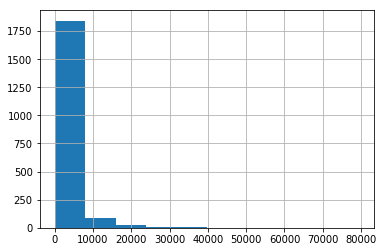

In [131]:
master['retweet_count'].hist()